# Model

## Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Import both scalers
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Load Data

In [2]:
# check the current working directory
current_working_directory = os.getcwd()
print(current_working_directory)

/Users/albertolandi/Documents/GitHub/ML2_Practice/ML2_Project/modelo_normal


In [3]:
PATH = '/Users/albertolandi/Documents/GitHub/ML2_Practice/ML2_Project'

# load data
data = pd.read_csv(f'{PATH}/dataset/AEP_hourly_preprocessed.csv')

# Display the first few rows of the dataframe
data.head()

,Datetime,AEP_MW,date,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,dayofyear_cos,AEP_MW_lag_1,AEP_MW_lag_2,AEP_MW_lag_3,AEP_MW_lag_6,AEP_MW_lag_12,AEP_MW_lag_24,AEP_MW_lag_48,AEP_MW_lag_72,AEP_MW_lag_168
0,2004-12-24 01:00:00,15645.0,2004-12-24,4,4,12,2004,359,24,52,...,0.994671,15676.0,16167.0,16621.0,16502.0,15967.0,16669.0,15059.0,16718.0,13478.0
1,2004-12-24 02:00:00,15265.0,2004-12-24,4,4,12,2004,359,24,52,...,0.994671,15645.0,15676.0,16167.0,16678.0,15088.0,16218.0,14617.0,16150.0,12865.0
2,2004-12-24 03:00:00,15138.0,2004-12-24,4,4,12,2004,359,24,52,...,0.994671,15265.0,15645.0,15676.0,16842.0,14564.0,16135.0,14452.0,16090.0,12577.0
3,2004-12-24 04:00:00,15068.0,2004-12-24,4,4,12,2004,359,24,52,...,0.994671,15138.0,15265.0,15645.0,16621.0,14394.0,16107.0,14465.0,16223.0,12517.0
4,2004-12-24 05:00:00,15122.0,2004-12-24,4,4,12,2004,359,24,52,...,0.994671,15068.0,15138.0,15265.0,16167.0,14745.0,16229.0,14561.0,16652.0,12670.0


In [4]:
# Display dataframe information
print("\nDataFrame Information:\n")
data.info()


DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121105 entries, 0 to 121104
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Datetime        121105 non-null  object 
 1   AEP_MW          121105 non-null  float64
 2   date            121105 non-null  object 
 3   dayofweek       121105 non-null  int64  
 4   quarter         121105 non-null  int64  
 5   month           121105 non-null  int64  
 6   year            121105 non-null  int64  
 7   dayofyear       121105 non-null  int64  
 8   dayofmonth      121105 non-null  int64  
 9   weekofyear      121105 non-null  int64  
 10  hour_sin        121105 non-null  float64
 11  hour_cos        121105 non-null  float64
 12  dayofweek_sin   121105 non-null  float64
 13  dayofweek_cos   121105 non-null  float64
 14  month_sin       121105 non-null  float64
 15  month_cos       121105 non-null  float64
 16  dayofyear_sin   121105 non-null

In [5]:
# Display summary statistics
print("\nSummary Statistics:\n")
data.describe()


Summary Statistics:



,AEP_MW,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,hour_sin,hour_cos,...,dayofyear_cos,AEP_MW_lag_1,AEP_MW_lag_2,AEP_MW_lag_3,AEP_MW_lag_6,AEP_MW_lag_12,AEP_MW_lag_24,AEP_MW_lag_48,AEP_MW_lag_72,AEP_MW_lag_168
count,121105.000000,121105.000000,121105.000000,121105.000000,121105.000000,121105.000000,121105.000000,121105.000000,121105.000000,1.211050e+05,...,121105.000000,121105.000000,121105.000000,121105.000000,121105.000000,121105.000000,121105.000000,121105.000000,121105.000000,121105.000000
mean,15498.349969,2.999513,2.500978,6.492771,2011.179927,182.171463,15.706387,26.461343,-0.000110,-1.298842e-04,...,0.004806,15498.314322,15498.279245,15498.244573,15498.137302,15497.940201,15497.704983,15496.743760,15496.306866,15492.599769
std,2592.181872,1.999816,1.121589,3.457784,4.005066,105.699699,8.796080,15.108906,0.707121,7.070980e-01,...,0.708793,2592.149745,2592.111954,2592.068852,2591.930654,2591.809977,2591.580354,2590.458152,2589.802450,2586.126459
min,9581.000000,0.000000,1.000000,1.000000,2004.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000e+00,...,-0.999963,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000
25%,13628.000000,1.000000,1.000000,3.000000,2008.000000,91.000000,8.000000,13.000000,-0.707107,-7.071068e-01,...,-0.708627,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000
50%,15308.000000,3.000000,2.000000,6.000000,2011.000000,181.000000,16.000000,26.000000,0.000000,-1.836970e-16,...,0.021516,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15307.000000,15307.000000,15305.000000
75%,17200.000000,5.000000,4.000000,10.000000,2015.000000,275.000000,23.000000,40.000000,0.707107,7.071068e-01,...,0.714673,17200.000000,17200.000000,17200.000000,17200.000000,17200.000000,17199.000000,17197.000000,17197.000000,17191.000000
max,25695.000000,6.000000,4.000000,12.000000,2018.000000,366.000000,31.000000,53.000000,1.000000,1.000000e+00,...,1.000000,25695.000000,25695.000000,25695.000000,25695.000000,25695.000000,25695.000000,25695.000000,25695.000000,25695.000000


## Train-test split

In [6]:
# Determine the split points 
train_size = 0.7
val_size = 0.2
test_size = 0.2

# Calculate split indices
train_end = int(len(data) * train_size)
val_end = train_end + int(len(data) * val_size)

# Split the data
train_data = data[:train_end]
val_data = data[train_end:val_end]
test_data = data[val_end:]

# Separate features (X) and target (y)
X_train = train_data.drop(['Datetime', 'date', 'AEP_MW'], axis=1)
y_train = train_data['AEP_MW']

X_val = val_data.drop(['Datetime', 'date', 'AEP_MW'], axis=1)
y_val = val_data['AEP_MW']

X_test = test_data.drop(['Datetime', 'date', 'AEP_MW'], axis=1)
y_test = test_data['AEP_MW']

In [7]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((84773, 24), (84773,), (24221, 24), (24221,), (12111, 24), (12111,))

## Scaling

In [8]:
# StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# Store scaled data in dictionaries for easy access
scaled_data = {
    'StandardScaler': {
        'X_train': X_train_scaled,
        'X_val': X_val_scaled,
        'X_test': X_test_scaled
    }
}

## Models

In [9]:
def train_and_evaluate_model(model, model_name, X_train, y_train, X_val, y_val, X_test, y_test):
    """
    Trains, evaluates, and prints results for a given model (using StandardScaler).

    Args:
        model: The scikit-learn model object.
        model_name: A string name for the model.
        X_train, y_train, X_val, y_val, X_test, y_test: Data splits.

    Returns:
        A dictionary containing the trained model and test set results.
    """

    # Always use StandardScaler
    X_train_used = X_train
    X_val_used = X_val
    X_test_used = X_test
    

    # Train the model
    print(f"Training {model_name}...")
    model.fit(X_train_used, y_train)

    # Evaluate on the validation set
    y_val_pred = model.predict(X_val_used)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    mae_val = mean_absolute_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)

    print(f"--- Validation Set Results ({model_name}) ---")
    print(f"RMSE: {rmse_val:.4f}")
    print(f"MAE: {mae_val:.4f}")
    print(f"R2: {r2_val:.4f}")

    # Evaluate on the test set
    y_test_pred = model.predict(X_test_used)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"--- Test Set Results ({model_name}) ---")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"MAE: {mae_test:.4f}")
    print(f"R2: {r2_test:.4f}")

    # Store results and model
    results = {
        'model': model,
        'val_rmse': rmse_val,
        'val_mae': mae_val,
        'val_r2': r2_val,
        'test_rmse': rmse_test,
        'test_mae': mae_test,
        'test_r2': r2_test
    }

    return results

In [10]:
# Initialize models
model_lr = LinearRegression()
model_ridge = Ridge(alpha=1.0)
model_rf = RandomForestRegressor(random_state=42)
model_gb = GradientBoostingRegressor(random_state=42)
model_knn = KNeighborsRegressor()

# Store all results
all_results = {}

In [11]:
# --- Linear Regression ---
all_results['Linear Regression'] = train_and_evaluate_model(
    model_lr, 'Linear Regression', scaled_data['StandardScaler']['X_train'], y_train, scaled_data['StandardScaler']['X_val'], y_val, scaled_data['StandardScaler']['X_test'], y_test
)



Training Linear Regression...
--- Validation Set Results (Linear Regression) ---
RMSE: 429.5066
MAE: 285.9617
R2: 0.9731
--- Test Set Results (Linear Regression) ---
RMSE: 403.2619
MAE: 270.1111
R2: 0.9732


In [12]:
# --- Ridge Regression ---
all_results['Ridge Regression'] = train_and_evaluate_model(
    model_ridge, 'Ridge Regression', scaled_data['StandardScaler']['X_train'], y_train, scaled_data['StandardScaler']['X_val'], y_val, scaled_data['StandardScaler']['X_test'], y_test
)


Training Ridge Regression...
--- Validation Set Results (Ridge Regression) ---
RMSE: 429.4924
MAE: 285.9977
R2: 0.9731
--- Test Set Results (Ridge Regression) ---
RMSE: 403.2588
MAE: 270.1535
R2: 0.9732


In [13]:
# --- Random Forest ---
all_results['Random Forest'] = train_and_evaluate_model(
    model_rf, 'Random Forest', scaled_data['StandardScaler']['X_train'], y_train, scaled_data['StandardScaler']['X_val'], y_val, scaled_data['StandardScaler']['X_test'], y_test
)


Training Random Forest...
--- Validation Set Results (Random Forest) ---
RMSE: 270.2368
MAE: 157.6918
R2: 0.9894
--- Test Set Results (Random Forest) ---
RMSE: 259.8172
MAE: 155.2116
R2: 0.9889


In [14]:
# --- Gradient Boosting ---
all_results['Gradient Boosting'] = train_and_evaluate_model(
    model_gb, 'Gradient Boosting', scaled_data['StandardScaler']['X_train'], y_train, scaled_data['StandardScaler']['X_val'], y_val, scaled_data['StandardScaler']['X_test'], y_test
)


Training Gradient Boosting...
--- Validation Set Results (Gradient Boosting) ---
RMSE: 375.1220
MAE: 249.9635
R2: 0.9795
--- Test Set Results (Gradient Boosting) ---
RMSE: 356.2825
MAE: 241.7131
R2: 0.9791


In [15]:
# --- KNN ---
all_results['KNN'] = train_and_evaluate_model(
    model_knn, 'KNN', scaled_data['StandardScaler']['X_train'], y_train, scaled_data['StandardScaler']['X_val'], y_val, scaled_data['StandardScaler']['X_test'], y_test
)


Training KNN...
--- Validation Set Results (KNN) ---
RMSE: 762.0423
MAE: 582.1106
R2: 0.9154
--- Test Set Results (KNN) ---
RMSE: 793.8702
MAE: 614.8820
R2: 0.8962


## Evaluation

In [37]:
# --- Compare Results ---
# Create a DataFrame for easier comparison
results_df = pd.DataFrame.from_dict(all_results, orient='index')
print("\n--- Comparison of All Models ---")
display(results_df[['val_rmse', 'test_rmse', 'val_mae', 'test_mae', 'val_r2', 'test_r2']])


--- Comparison of All Models ---


,val_rmse,test_rmse,val_mae,test_mae,val_r2,test_r2
Linear Regression,429.506580,403.261915,285.961721,270.111124,0.973140,0.973226
Ridge Regression,429.492412,403.258819,285.997745,270.153497,0.973142,0.973227
Random Forest,270.236830,259.817188,157.691757,155.211601,0.989367,0.988886
Gradient Boosting,375.121956,356.282516,249.963518,241.713115,0.979511,0.979101
KNN,762.042341,793.870151,582.110615,614.882041,0.915448,0.896240


In [38]:
# Find the best model based on validation RMSE
best_model_name = results_df['val_rmse'].idxmin()
best_model = all_results[best_model_name]['model']
print(f"\nBest model based on validation RMSE: {best_model_name}")


Best model based on validation RMSE: Random Forest


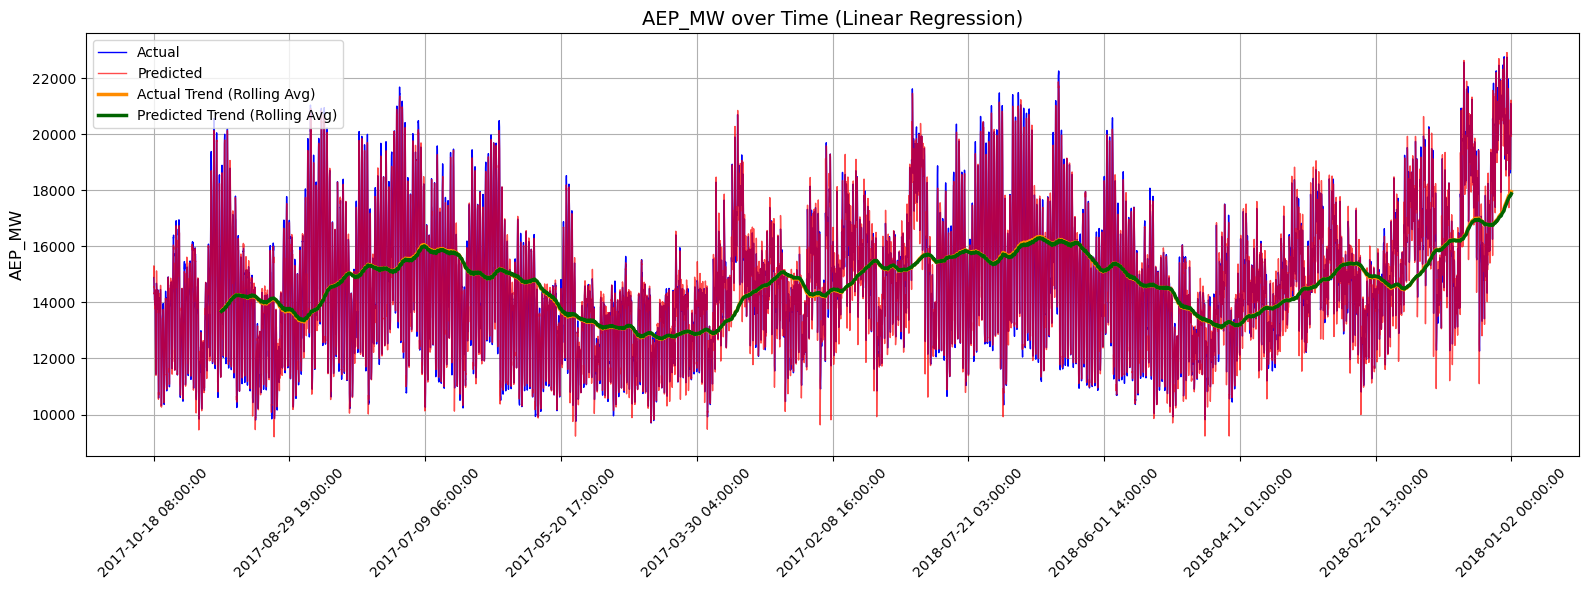

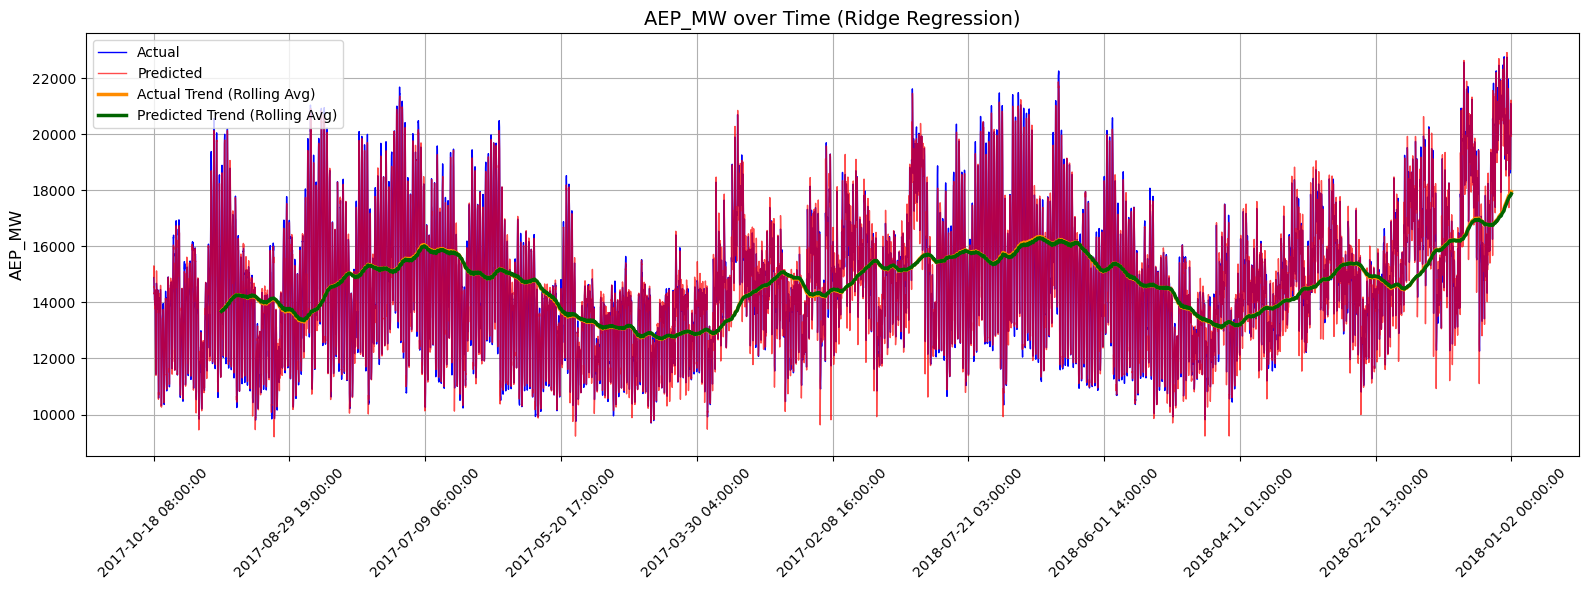

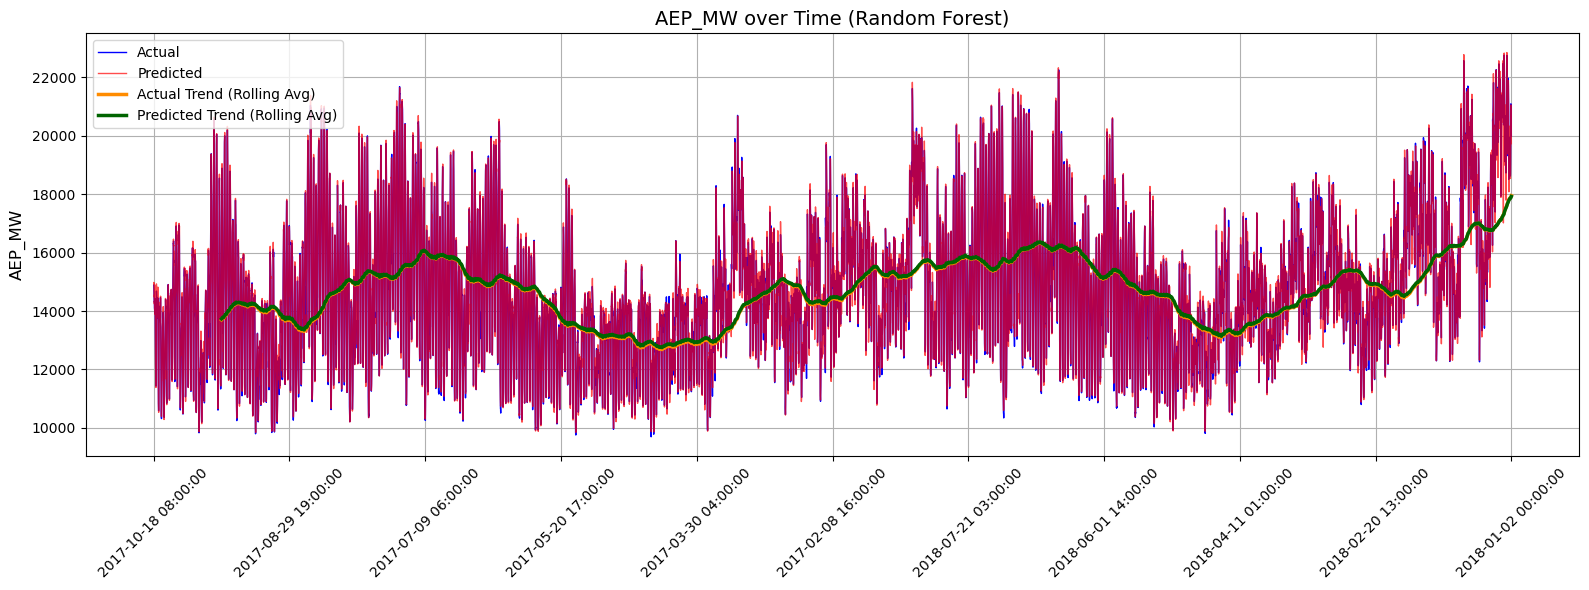

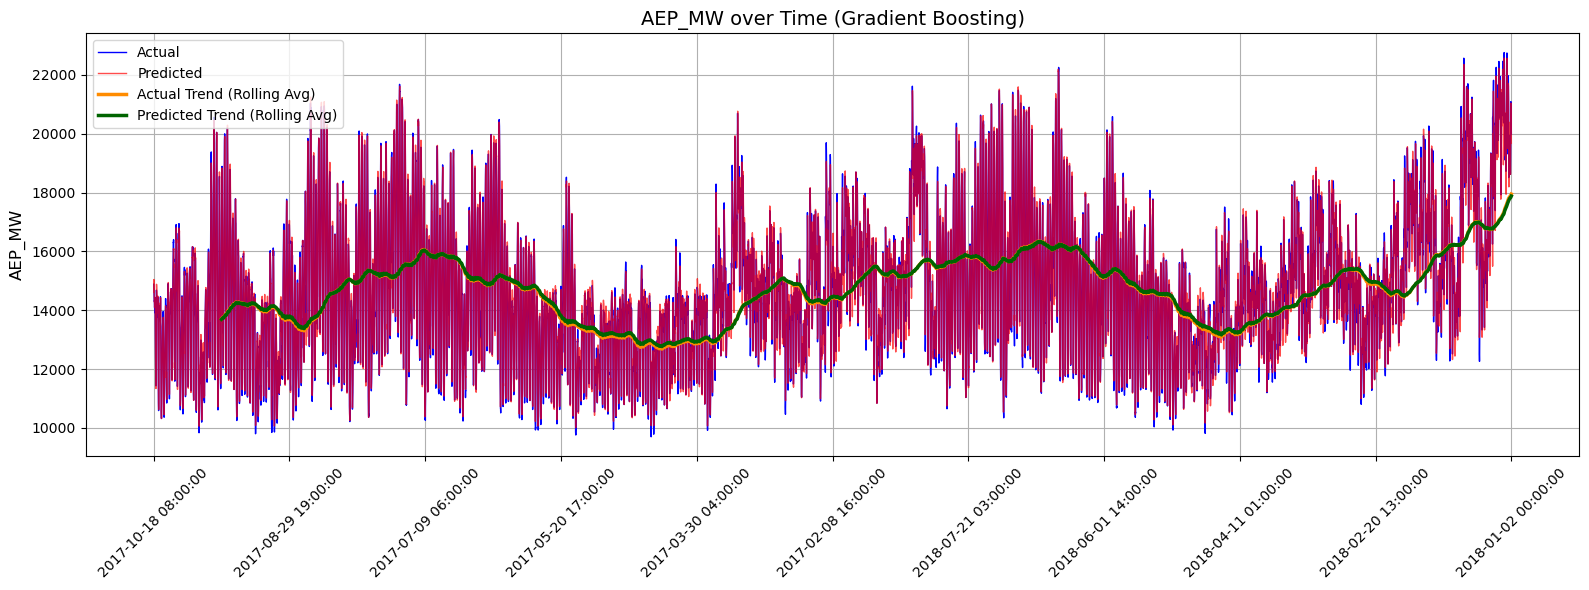

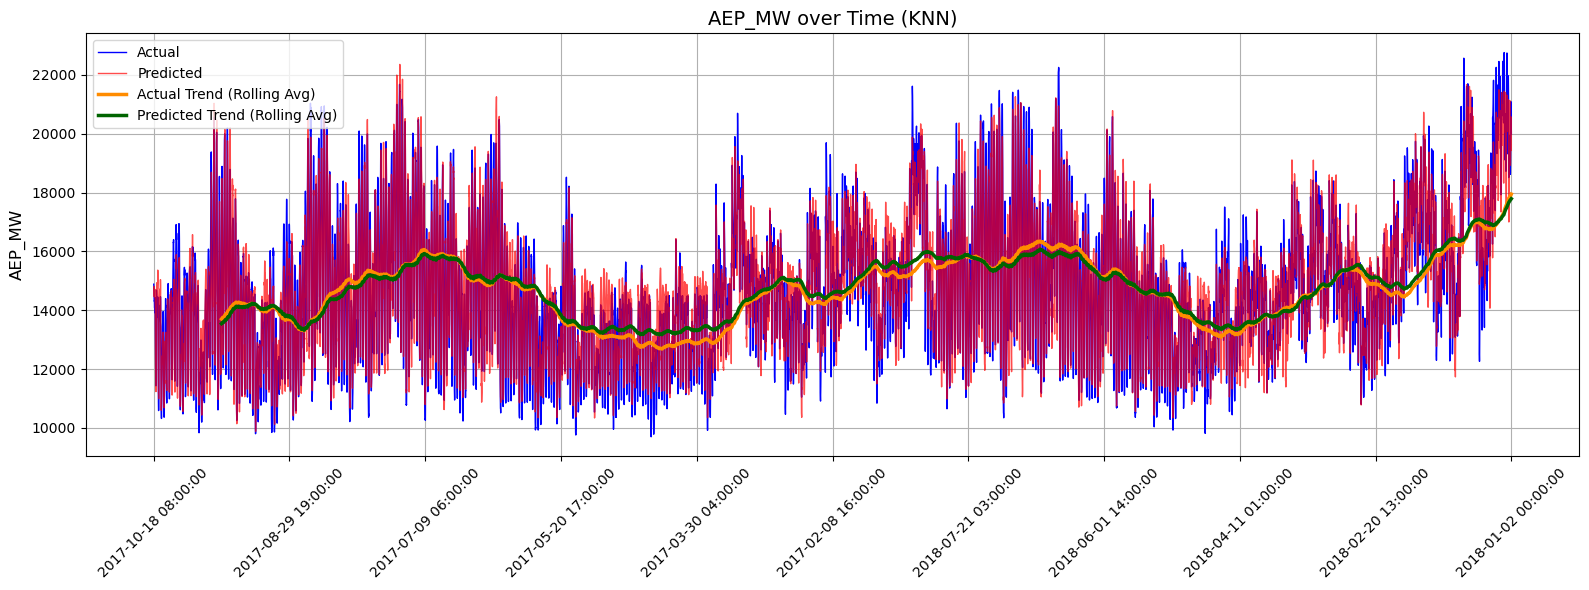

In [36]:
def plot_time_series_predictions(model, X_test, y_test, title, start_date=None, end_date=None):
    """
    Plots the actual and predicted values over time, with distinct trendlines.

    Args:
        model: The trained scikit-learn model.
        X_test: Test set features.
        y_test: Test set target values (AEP_MW).
        title: A string title for the plot.
        start_date: (Optional) Start date for plotting (datetime object or string).
        end_date: (Optional) End date for plotting (datetime object or string).
    """

    y_pred = model.predict(X_test)

    # Create a DataFrame
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
    results_df = results_df.merge(data[['Datetime']], left_index=True, right_index=True)

    # Date filtering
    if start_date is not None:
        results_df = results_df[results_df['Datetime'] >= pd.to_datetime(start_date)]
    if end_date is not None:
        results_df = results_df[results_df['Datetime'] <= pd.to_datetime(end_date)]

    plt.figure(figsize=(16, 6))

    # Calculate trendlines
    window_size = int(len(results_df) * 0.05)
    window_size = max(window_size, 2)
    actual_trendline = results_df['Actual'].rolling(window=window_size).mean()
    predicted_trendline = results_df['Predicted'].rolling(window=window_size).mean()

    # Plot Actual and Predicted (keep these as they are)
    plt.plot(results_df['Datetime'], results_df['Actual'], label='Actual', color='blue', alpha=1, linewidth=1)
    plt.plot(results_df['Datetime'], results_df['Predicted'], label='Predicted', color='red', alpha=0.7, linewidth=1)

    # Plot trendlines with solid lines, thicker, and contrasting colors
    plt.plot(results_df['Datetime'], actual_trendline, color='darkorange', linestyle='-', linewidth=2.5, label='Actual Trend (Rolling Avg)')
    plt.plot(results_df['Datetime'], predicted_trendline, color='darkgreen', linestyle='-', linewidth=2.5, label='Predicted Trend (Rolling Avg)')


    # Plot every few ticks
    tick_interval = len(results_df) // 10
    plt.xticks(results_df['Datetime'][::tick_interval], rotation=45)
    plt.ylabel('AEP_MW', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(fontsize=10, loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Choose a subset of models to plot (excluding SVR)
models_to_plot = {
    name: result['model'] for name, result in all_results.items()
}

# Plot time series for selected models
for name, model in models_to_plot.items():
        #Always use standard scaler
        X_test_used = scaled_data['StandardScaler']['X_test']
        plot_time_series_predictions(model, X_test_used, y_test, title=f'AEP_MW over Time ({name})')